In [86]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
from hurst import compute_Hc

In [87]:
from os import listdir
files = listdir('data')

In [101]:
variableBorrowRates = dict()

for file_name in files:
    f = pd.read_csv('data/'+file_name)
    _id = (f.variableBorrowRate_avg == 0) 
    
    f = f.loc[~_id]
    
    f = f.loc[~f.x.isna()]

    rate = pd.Series(list(f.variableBorrowRate_avg), index = pd.to_datetime(f.x))

    variableBorrowRates[file_name[:4]] = rate

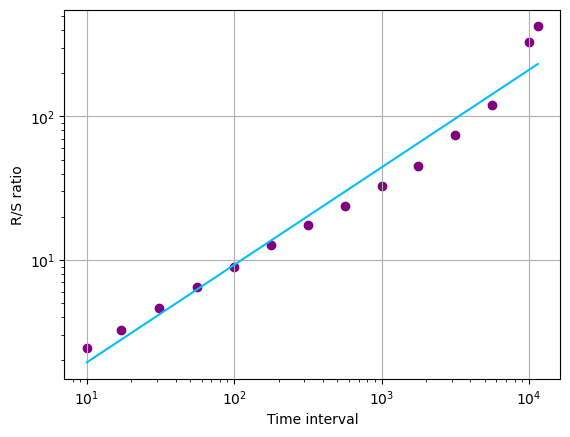

USDT: H=0.6782, c=0.4074


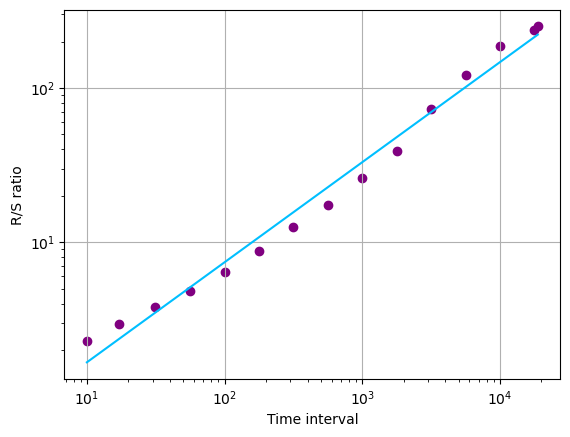

WETH: H=0.6488, c=0.3737


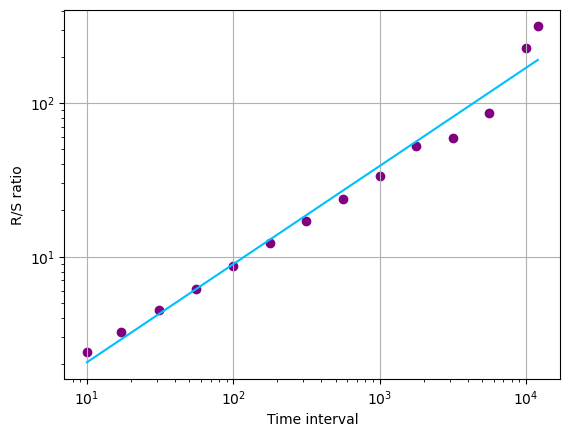

USDC: H=0.6391, c=0.4714


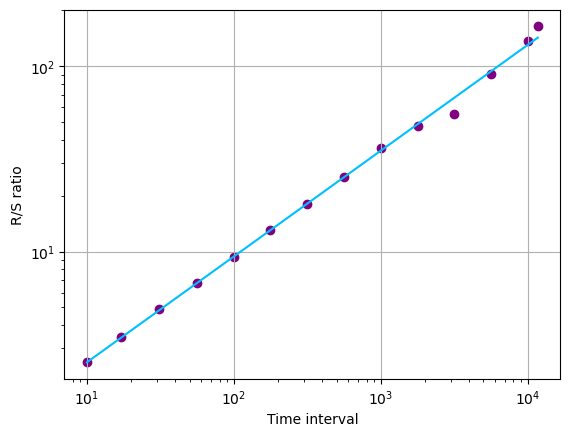

WBTC: H=0.5711, c=0.6774


In [107]:
H_results = dict()

for coin in variableBorrowRates:
    H, c, data = compute_Hc(variableBorrowRates[coin],
                            kind='price', simplified=False)
    f, ax = plt.subplots()
    ax.plot(data[0], c*data[0]**H, color="deepskyblue")
    ax.scatter(data[0], data[1], color="purple")
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Time interval')
    ax.set_ylabel('R/S ratio')
    ax.grid(True)
    plt.show()
    print(coin+": H={:.4f}, c={:.4f}".format(H,c))
    
    H_results[coin] = (H, c)

In [108]:
H_results = pd.DataFrame(H_results).T
H_results.columns = ['H', 'c']
H_results

,H,c
USDT,0.678185,0.407436
WETH,0.648850,0.373672
USDC,0.639089,0.471380
WBTC,0.571113,0.677434


In [127]:
def twoSum(nums, target):
    for i, n in enumerate(nums):
        try:
            j = nums.index(target - n)
            if i !=j:
                print(j)
                return [i, j]
        except:
            pass

In [140]:
x = 1234
S = list(str(x))

for i, s in enumerate(S[:int(len(S)/2)]):
    if S[i] == S[len(S)-i-1]:
        continue
    else:
        print('a')
        
        

a
a


In [139]:
S[len(S)-i]

IndexError: list index out of range

In [150]:
data = [[1, 'a@b.com'], [2, 'c@d.com'], [3, 'a@b.com']]
person = pd.DataFrame(data, columns=['id', 'email']).astype({'id':'Int64', 'email':'object'})



df = pd.pivot_table(person, index='email', aggfunc='count')
pd.DataFrame(df.loc[df.id > 1].index)

,email
0,a@b.com


In [189]:
data = [[1, 'Joe', 70000, 3], [2, 'Henry', 80000, 4], [3, 'Sam', 60000, None], [4, 'Max', 90000, None]]
employee = pd.DataFrame(data, columns=['id', 'name', 'salary', 'managerId']).astype({'id':'Int64', 'name':'object', 'salary':'Int64', 'managerId':'Int64'})


result = employee.merge(employee, how = 'left', left_on = 'managerId', right_on = 'id')
result.loc[result.salary_x > result.salary_y].loc[:, 'name_x']


In [196]:
a = [0,0,0,1]

a.remove(0)
a

[0, 0, 1]

In [232]:
grid = [[1,3,1],
        [1,5,1],
        [4,2,1]]

m = len(grid)
n = len(grid[0])
dp = [[0]*n for _ in range(m)]


dp[0][0] = grid[0][0]

for i in range(1, m):
    dp[i][0] = dp[i-1][0] + grid[i][0]

for j in range(1, n):
    dp[0][j] = dp[0][j-1] + grid[0][j]

for i in range(1, m):
    for j in range(1, n):
        dp[i][j] = grid[i][j] + min([dp[i-1][j], dp[i][j-1]])

dp


[[1, 4, 5], [2, 7, 6], [6, 8, 7]]

In [264]:
obstacleGrid = [[0,0],[1,1],[0,0]]

m = len(obstacleGrid)
n = len(obstacleGrid[0])
dp = [[0 for _ in range(n)] for _ in range(m)]

if obstacleGrid[0][0] == 0:
    dp[0][0] = 1
else:
    0

for i in range(1, m):
    if obstacleGrid[i][0] == 0:
        dp[i][0] = dp[i-1][0]
for j in range(1, n):
    if obstacleGrid[0][j] == 0:
        dp[0][j] = dp[0][j-1]

# for i in range(1, m):
#     for j in range(1, n):
#         if obstacleGrid[i][j] == 0:
#             dp[i][j] = dp[i-1][j] + dp[i][j-1]
dp

[[1, 1], [0, 0], [0, 0]]

In [326]:
matrix = [[100,-42,-46,-41],
          [31,97,10,-10],
          [-58,-51,82,89],
          [51,81,69,-51]]

m = len(matrix)
n = len(matrix[0])
dp = [[0 for _ in range(m)] for _ in range(n)]

for j in range(n):
    dp[0][j] = matrix[0][j]

for i in range(1, m):
    for j in range(n):
        s = max([j-1,  0])
        e = min([j+1, n-1])
        dp[i][j] = matrix[i][j] + min(dp[i-1][s:e+1])

dp

[[100, -42, -46, -41],
 [-11, 51, -36, -56],
 [-69, -87, 26, 33],
 [-36, -6, -18, -25]]

In [331]:
82-56

26

In [334]:
q = [1,3,2,4,5]
oq = list(range(1, len(q)+1))
oq

[1, 2, 3, 4, 5]

In [339]:
a = 'abc'

b = a[:].upper()
print(a, b)

abc ABC


In [341]:
a[1].upper()


'B'

In [348]:
a = [1,3,1,1]

a.remove(1)
a.remove(1)

a

[3, 1]

In [355]:
n = 13
binary = bin(n)[2:]

b = binary.zfill(32)



'00000000000000000000000000001101'

In [357]:
import math
n = 10
r = 0
math.factorial(n)/math.factorial(r)/math.factorial(n-r)

1.0